# NLP_Session_2_AmazonReviews_Example

## Amazon Review Polarity Dataset

## DOWNLOAD DATA FROM HERE
https://www.kaggle.com/kritanjalijain/amazon-reviews/download 
Extract the train and test CSV files to your google drive location and configure that in the code

### OVERVIEW
Contains 34,686,770 Amazon reviews from 6,643,669 users on 2,441,053 products, from the Stanford Network Analysis Project (SNAP). This subset contains 1,800,000 training samples and 200,000 testing samples in each polarity sentiment.

### ORIGIN
The Amazon reviews dataset consists of reviews from amazon. The data span a period of 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review. For more information, please refer to the following paper: J. McAuley and J. Leskovec. Hidden factors and hidden topics: understanding rating dimensions with review text. RecSys, 2013.

### DESCRIPTION
The Amazon reviews polarity dataset is constructed by taking review score 1 and 2 as negative, and 4 and 5 as positive. Samples of score 3 is ignored. In the dataset, class 1 is the negative and class 2 is the positive. Each class has 1,800,000 training samples and 200,000 testing samples.

If you need help extracting the train.csv and test.csv files check out the starter code.

The files train.csv and test.csv contain all the training samples as comma-separated values.

The CSVs contain polarity, title, text. These 3 columns in them, correspond to class index (1 or 2), review title and review text.

polarity - 1 for negative and 2 for positive
title - review heading
text - review body
The review title and text are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

### CITATION
The Amazon reviews polarity dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu). It is used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).

# About TextBLOB library
TextBlob is a Python (2 and 3) library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

Reference : https://textblob.readthedocs.io/en/dev/ 

## Reference
1. https://www.kaggle.com/kritanjalijain/amazon-reviews
2. https://www.kaggle.com/sindhuguttal/amazon-review-using-nlp/data
2. https://textblob.readthedocs.io/en/dev/


# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile 
import seaborn as sns
import matplotlib.style as style
import matplotlib as mpl
import re
import string
import itertools
import collections
from wordcloud import WordCloud
import nltk 
from nltk.util import ngrams
from nltk.corpus import stopwords,RegexpTokenizer
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer

# Setting up NLP Libraries and corpus

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Mounting the data source

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Configuring the input, output and process folders

In [4]:
# Model Input and output folders
# Setup in Google drive
# '/content/drive/MyDrive/yourlocation/input/'
model_input_folder='/content/drive/MyDrive/yourlocation/input/'
model_output_folder='/content/drive/MyDrive/yourlocation/output/'
input_train_file=model_input_folder+'train.csv'
input_test_file=model_input_folder+'test.csv'
output_nlp_detail=model_output_folder+'nlp_details.csv'

# Loading the training dataset

In [5]:
# check out what the data looks like before you get started
# look at the training data set
train_df = pd.read_csv(input_train_file, header=None)
print(train_df.head())

   0  ...                                                  2
0  2  ...  This sound track was beautiful! It paints the ...
1  2  ...  I'm reading a lot of reviews saying that this ...
2  2  ...  This soundtrack is my favorite music of all ti...
3  2  ...  I truly like this soundtrack and I enjoy video...
4  2  ...  If you've played the game, you know how divine...

[5 rows x 3 columns]


In [6]:
train_df.shape

(3600000, 3)

## Reducing the size of the dataframe for demonstration purposes

In [7]:
# Reducing the size of the dataframe
train_df=train_df.loc[1:10000]

In [8]:
for col in train_df.columns:
    print(col)

0
1
2


In [9]:
#checking a null values
train_df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [10]:
#droping null vlaues
train_df.dropna()

,0,1,2
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
5,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
9996,2,Great biography of a very interesting journalist,"This biography of Arthur Aull, a small-town jo..."
9997,1,Interesting Subject; Poor Presentation,You'd be hard-pressed to tell a boring story a...
9998,1,Don't buy,The box looked used and it is obviously not ne...
9999,2,Beautiful Pen and Fast Delivery.,The pen was shipped promptly. This is the clas...


In [11]:
train_df.isnull().count()

0    10000
1    10000
2    10000
dtype: int64

# Quick look at the dataset loaded

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  int64 
 1   1       10000 non-null  object
 2   2       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [13]:
train_df.drop([0],axis=1,inplace=True)

In [14]:
for col in train_df.columns:
    print(col)

1
2


In [15]:
train_df.drop([1],axis=1,inplace=True)

In [16]:
train_df.shape

(10000, 1)

In [17]:
train_df.sample(5)

,2
5350,This is a lovely movie set in the stunning bea...
1640,joyful and scared by my absolute ignorance on ...
159,I have read Baseball America off and on over t...
3244,Reasons not to buy this video:1. She reads fro...
2865,"This film was by far, the most mediocre, melod..."


In [18]:
# Checking for Null Values
train_df[train_df[2].isnull()]

,2


# Obtaining the review lengths

In [19]:
train = train_df.copy()
train[2].apply(str)

1        I'm reading a lot of reviews saying that this ...
2        This soundtrack is my favorite music of all ti...
3        I truly like this soundtrack and I enjoy video...
4        If you've played the game, you know how divine...
5        I am quite sure any of you actually taking the...
                               ...                        
9996     This biography of Arthur Aull, a small-town jo...
9997     You'd be hard-pressed to tell a boring story a...
9998     The box looked used and it is obviously not ne...
9999     The pen was shipped promptly. This is the clas...
10000    I have read "In My Soul I Am Free" that the au...
Name: 2, Length: 10000, dtype: object

In [20]:
train["review_length"] = train[2].apply(lambda w : len(re.findall(r'\w+', w)))

# Getting some statistics around the review length

In [21]:
train['review_length'].describe()

count    10000.000000
mean        77.582300
std         43.965722
min          2.000000
25%         41.000000
50%         68.000000
75%        108.000000
max        213.000000
Name: review_length, dtype: float64

## Doing some graphical plots

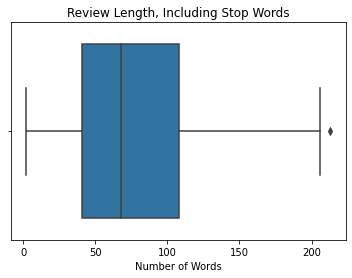

In [22]:
sns.boxplot(data = train , x="review_length")
plt.xlabel('Number of Words')
plt.title('Review Length, Including Stop Words')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


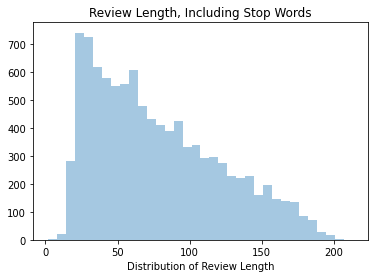

In [23]:
sns.distplot(train['review_length'], kde = False)
plt.xlabel('Distribution of Review Length')
plt.title('Review Length, Including Stop Words')
plt.show()

# If we want to do better we must pre-process data like
1. Converting to lower case
2. Removing punctuation
3. Removing Numbers
4. Removing trailing spaces
5. Removing extra whitespaces

In [24]:
train_clean = train.copy()
stop_words = stopwords.words("english")

## Function to clean text

In [25]:
# Function for cleaning text
def clean(s):
    s = s.lower()                   #Converting to lower case
    s = re.sub(r'[^\w\s]', ' ', s)  #Removing punctuation
    s = re.sub(r'[\d+]', ' ', s)    #Removing Numbers
    s = s.strip()                   #Removing trailing spaces
    s = re.sub(' +', ' ', s)        #Removing extra whitespaces
    return s

In [26]:
train_clean["Reviews"] = train_clean[2].apply(lambda x: clean(x))

In [27]:
train_clean.sample(2)

,2,review_length,Reviews
4882,This item is one of the worse I have seen in t...,174,this item is one of the worse i have seen in t...
2271,I saw the video for Galang on BPM and was laug...,197,i saw the video for galang on bpm and was laug...


## 1. Removal of STOP WORDS

In [28]:
# Removal of Stop Words
train_clean["Reviews"] = train_clean["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

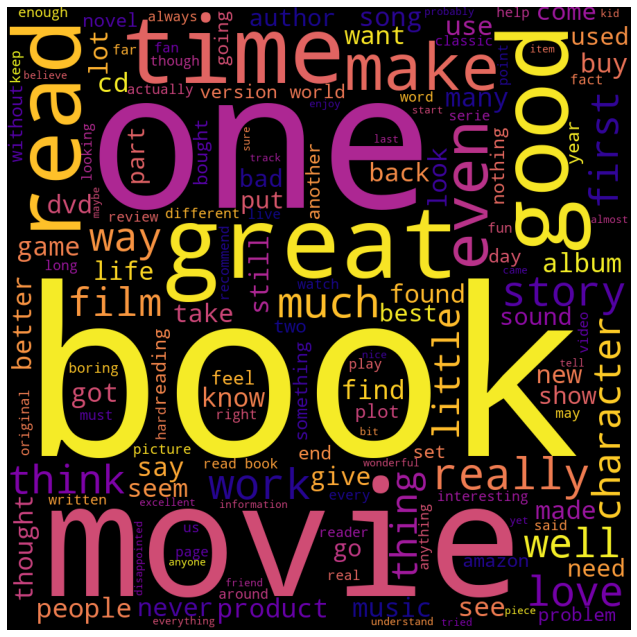

In [29]:
import pandas as pd
reviews = pd.Series(train_clean["Reviews"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

# Detailed NLP Analysis

In [30]:
tokenizer = RegexpTokenizer(r'\w+')
train_clean["review_token"] = train_clean["Reviews"].apply(lambda x: tokenizer.tokenize(x))
# Sentiment analysis
train_clean["sentiment_polarity"] = train_clean["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)
train_clean["sentiment_subjectivity"] = train_clean["Reviews"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
# Pos breakdown
train_clean["pos"] = train_clean["Reviews"].apply(lambda x: TextBlob(x).tags)
train_clean["words"] = train_clean["Reviews"].apply(lambda x: TextBlob(x).words)
train_clean["sentences"] = train_clean["Reviews"].apply(lambda x: TextBlob(x).sentences)
#returns a list of tuples of n successive words
train_clean["ngrams_3"] = train_clean["Reviews"].apply(lambda x: TextBlob(x).ngrams(n=3))
train_clean["ngrams_5"] = train_clean["Reviews"].apply(lambda x: TextBlob(x).ngrams(n=5))
#writing the detailed analysis
train_clean.to_csv()